In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,t
from scipy.optimize import minimize
import statsmodels as sm
import random


Daily_Price = pd.read_csv("DailyPrices.csv")
portfolio= pd.read_csv("portfolio.csv")


In [269]:
# Problem 1

def generate_Classical_Brownian_Motion(sigma,t,p0):
    p=[]
    r=[]
    p.append(p0)
    
    for i in range(t):
        rt=np.random.normal(0,sigma)
        r.append(rt)
        tmp=p[i]+rt
        p.append(tmp)
    
    # print("The Classical Brownian Motion's result:")
    # print("Mean:"+ str(np.mean(p)))
    # print("Standard deviation:"+ str(np.std(p)))
    
    return p,np.mean(p),np.std(p)
    
def generate_Arithmetic_Return_System(sigma,t,p0):
    p=[]
    r=[]
    p.append(p0)
    
    for i in range(t):
        rt=np.random.normal(0,sigma)
        r.append(rt)
        tmp=p[i]*(1+rt)
        p.append(tmp)
    
    # print("The Arithmetic Return System's result:")
    # print("Mean:"+ str(np.mean(p)))
    # print("Standard deviation:"+ str(np.std(p)))
    
    return p,np.mean(p),np.std(p)

def generate_Geometric_Brownian_Motion(sigma,t,p0):
    p=[]
    r=[]
    p.append(p0)
    
    for i in range(t):
        rt=np.random.normal(0,sigma)
        r.append(rt)
        tmp=p[i]*np.exp(rt)
        p.append(tmp)
    
    # print("The Geometric Brownian Motion's result:")
    # print("Mean:"+ str(np.mean(p)))
    # print("Standard deviation:"+ str(np.std(p)))
    
    return p,np.mean(p),np.std(p)




In [274]:
def once_plot(sigma,t,p0):
    pc=generate_Classical_Brownian_Motion(sigma,t,p0)[0]
    pa=generate_Arithmetic_Return_System(sigma,t,p0)[0]
    pg=generate_Geometric_Brownian_Motion(sigma,t,p0)[0]
    
    print('When sigma = '+str(sigma)+' , and t = '+str(t)+' , and p0 = '+str(p0)+" :")
    print("Classical_Brownian_Motion: ")
    print("    mean = "+str(pc[1]))
    print("    std = "+str(pc[2]))
    # print("    Expected mean = "+str(p0))
    # print("    Expected std = "+str(sigma))
    
    print("Arithmetic_Return_System: ")
    print("    mean = "+str(pa[1]))
    print("    std = "+str(pa[2]))

    
    print("Geometric_Brownian_Motion: ")
    print("    mean = "+str(pg[1]))
    print("    std = "+str(pg[2]))

    
    plt.figure(figsize=(25,12))

    plt.plot(pc,lw=1,ms=4,label='Classical_Brownian_Motion')
    plt.plot(pa,lw=1,ms=4,label='Arithmetic_Return_System')
    plt.plot(pg,lw=1,ms=4,label='Geometric_Brownian_Motion')

    plt.legend()
    plt.title("the moving path of each simulation")
    plt.show()
    

When sigma = 0.05 , and t = 100 , and p0 = 100 :
Classical_Brownian_Motion: 
    mean = 100.05239559566449
    std = 100.08158625423121
Arithmetic_Return_System: 
    mean = 101.89732020087376
    std = 104.83455243931293
Geometric_Brownian_Motion: 
    mean = 101.32645761469684
    std = 105.26724814242334


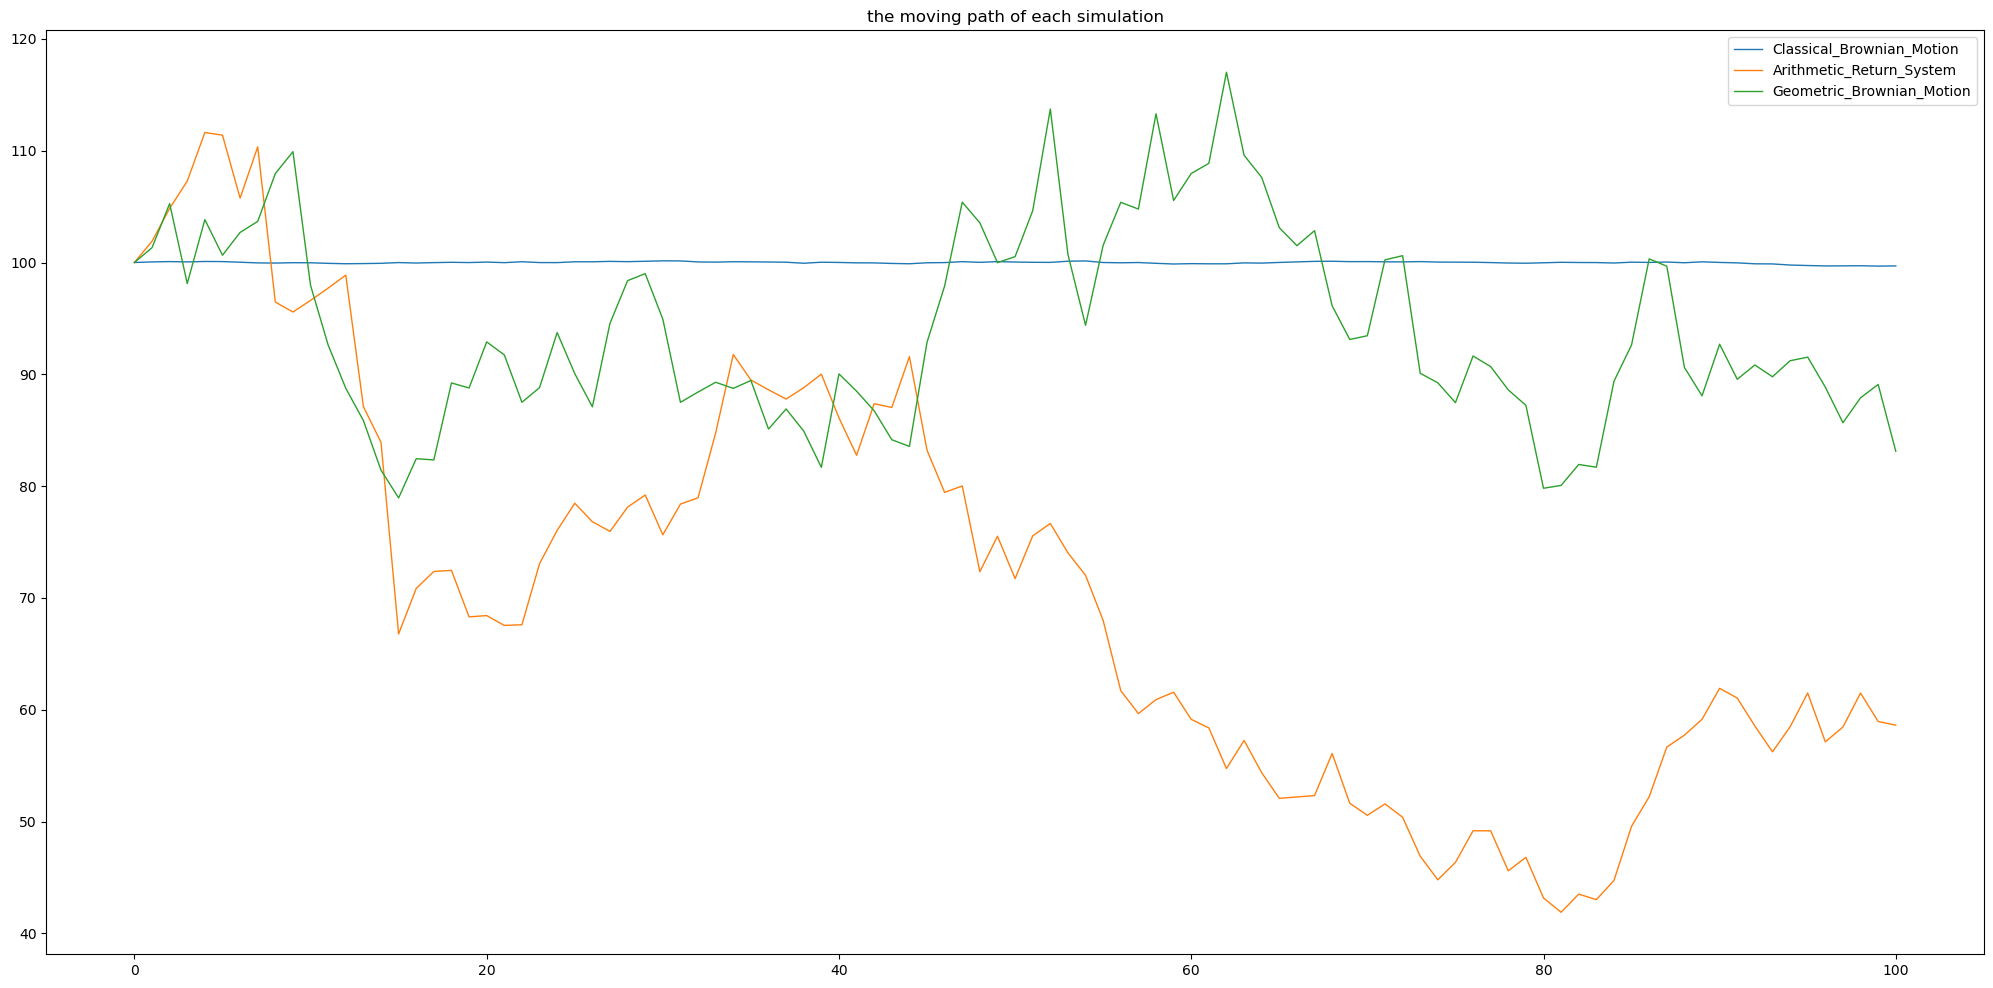

In [275]:
once_plot(0.05,100,100)

In [276]:
def test_std(n,sigma,p0,t):
    p1=[]
    p2=[]
    p3=[]
    
    for i in range(n):
        p1.append(generate_Classical_Brownian_Motion(sigma,t,p0)[0][t-1])
        p2.append(generate_Arithmetic_Return_System(sigma,t,p0)[0][t-1])
        p3.append(generate_Geometric_Brownian_Motion(sigma,t,p0)[0][t-1])
        
    mean1=np.mean(p1)
    mean2=np.mean(p2)
    mean3=np.mean(p3)
    std1=np.std(p1)
    std2=np.std(np.log(p2))
    std3=np.std(np.log(p3))
    
    print('When sigma = '+str(sigma)+' , and t = '+str(t)+' , and p0 = '+str(p0)+" :")
    print("After "+str(n)+" times' generating:")
    print("Classical_Brownian_Motion:")
    print("                   mean: "+str(mean1))
    print("                   standard deviation:"+str(std1))
    print("                   Expected mean: "+str(p0))
    print("                   Expected standard deviation:"+str(np.sqrt(t)*sigma))
    print("Arithmetic_Return_System:")
    print("                   mean: "+str(mean2))
    print("                   standard deviation:"+str(std2))
    print("                   Expected mean: "+str(p0))
    print("                   Expected standard deviation:"+str(np.sqrt(t)*sigma))
    print("Geometric_Brownian_Motion:")
    print("                   mean: "+str(mean3))
    print("                   standard deviation:"+str(std3))
    print("                   Expected mean: "+str(p0))
    print("                   Expected standard deviation:"+str(np.sqrt(t)*sigma))
        
        
    

In [277]:
test_std(1000,0.05,100,100)

When sigma = 0.05 , and t = 100 , and p0 = 100 :
After 1000 times' generating:
Classical_Brownian_Motion:
                   mean: 99.98755461673942
                   standard deviation:0.49120713268754795
                   Expected mean: 100
                   Expected standard deviation:0.5
Arithmetic_Return_System:
                   mean: 98.5117192325096
                   standard deviation:0.5033926000205191
                   Expected mean: 100
                   Expected standard deviation:0.5
Geometric_Brownian_Motion:
                   mean: 116.71159983699317
                   standard deviation:0.5158694770503853
                   Expected mean: 100
                   Expected standard deviation:0.5


In [57]:
# Problem2

def return_calculate(method,price,date):
    df1=price.drop(columns=date)
    if method=="Brownian_Motion":
        return_df=df1-df1.shift()
    if method=="ArithmeticReturn":
        return_df=(df1-df1.shift())/df1.shift()
    if method=="Geometric_Brownian_Motion":
        tmp=df1/df1.shift()
        return_df=np.log(tmp)
        
    return return_df


return_df=return_calculate('ArithmeticReturn',Daily_Price,'Date').dropna()
return_meta=return_df['META']
meta_mean=np.mean(return_meta)
# print("The mean of META is "+str(meta_mean))
adj_meta_mean=return_df['META']-meta_mean # remove mean of META


The mean of META is -1.6301064300270232e-05


In [278]:
return_df

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [279]:
adj_meta_mean

1      0.015175
2     -0.020165
3     -0.040761
4     -0.007446
5     -0.019774
         ...   
244   -0.011850
245   -0.002503
246    0.029899
247   -0.042725
248   -0.030022
Name: META, Length: 248, dtype: float64

In [286]:
# Calculate VaR
# 1. Using a normal distribution.
def Norm_VaR(price,miu,alpha):
    sigma=price.std()
    z_score = norm.ppf(alpha,loc=miu,scale=sigma)
    VaR=-z_score
    return VaR,sigma

# 2. Using a normal distribution with an Exponentially Weighted variance (λ = 0. 94)
def Cal_weight(lamda,n):
    w=np.zeros(n)
    total_w=0
    for i in range(n):
        tmp=(1-lamda)*pow(lamda,i-1)
        w[i]=tmp
        total_w+=tmp

    w=w/total_w
    return w
    
def Cal_cov(w,x,y):
    n=len(x)
    cov=0
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    
    for i in range(n):
        cov+=(x[i]-x_mean)*(y[i]-y_mean)*w[n-1-i]
    
    return cov


def EW_VaR(price,miu,alpha,lamda):
    nsize=len(price)
    weights=Cal_weight(lamda,nsize)
    
    
    sigma=np.sqrt(Cal_cov(weights,price,price))
    z_score = norm.ppf(alpha,loc=miu,scale=sigma)
    VaR=-z_score
    
    return VaR,sigma

# 3. Using a MLE fitted T distribution.

def MLE_t(pars, x):
    df = pars[0]
    sigma=pars[1]
    ll = t.logpdf(x, df=df,scale=sigma)
    return -ll.sum()

def MLE_T_VaR(price,miu,alpha):
    cons = ({'type': 'ineq', 'fun': lambda x: x[1] - 0})
    # params=t.fit(price)
    
    model = minimize(MLE_t, [price.size, 1], args = price, constraints = cons)
    estimator=model.x
    VaR = -t.ppf(alpha, df=estimator[0], loc=miu, scale=estimator[1])
    
    return VaR,estimator

# 4. Using a fitted AR(1) model.

def AR_VaR(price,miu,alpha):
    price=np.array(price)
    model = sm.tsa.ar_model.AutoReg(price, lags = 1)
    results = model.fit()
    a = results.params[0]
    beta = results.params[1]
    sigma = results.resid.std()
    
    z_score = norm.ppf(alpha,loc=0,scale=1)
    Y_t = price[-1]
    VaR = -((a + beta*Y_t)+z_score*sigma)
    return VaR,sigma


# 5. Using a Historic Simulation.

def Historic_Simulation(price,miu,alpha,N_draws):
    
    simulate_list = price.sample(N_draws, replace=True)
    VaR=-np.percentile(simulate_list,(100 * alpha))
    
    return VaR,simulate_list



In [287]:
print("When alpha=0.05")
norm_var,sigma_n =Norm_VaR(adj_meta_mean,0,0.05)

print("The VaR of using a normal distribution = "+str(norm_var))
ew_var,sigma_ewn =EW_VaR(np.array(adj_meta_mean),0,0.05,0.94)
print("The VaR of using a normal distribution with an Exponentially Weighted variance (λ = 0. 94) = "+str(ew_var))
mle_var,estimator =MLE_T_VaR(adj_meta_mean,0,0.05)
print("The VaR of using a MLE fitted T distribution = "+str(mle_var))
ar_var,sigma_ar =AR_VaR(adj_meta_mean,0,0.05)
print("The VaR of using a fitted AR(1) model = "+str(ar_var))
his_var,s_list =Historic_Simulation(adj_meta_mean,0,0.05,1000)
print("The VaR of using a Historic Simulation = "+str(his_var))


When alpha=0.05
The VaR of using a normal distribution = 0.06560156967533283
The VaR of using a normal distribution with an Exponentially Weighted variance (λ = 0. 94) = 0.09138526093846899
The VaR of using a MLE fitted T distribution = 0.05725638549603684
The VaR of using a fitted AR(1) model = 0.06586001439007666
The VaR of using a Historic Simulation = 0.0559068136733708


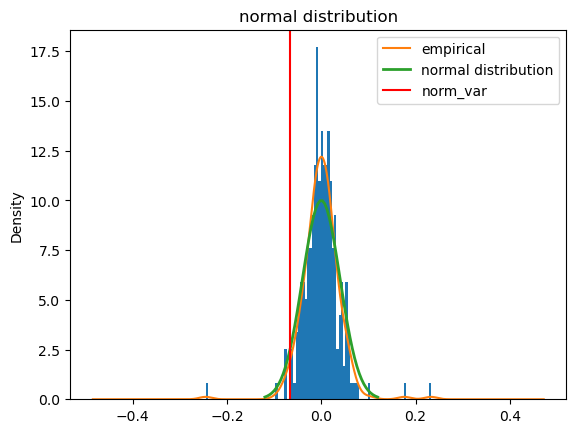

In [293]:
import scipy.stats as st

u=0
plt.cla()
adj_meta_mean.hist(bins=100,density=True)  
adj_meta_mean.plot(kind='kde', label = "empirical")
x = np.linspace(u - 3*sigma_n, u + 3*sigma_n) 
y = st.norm.pdf(x, loc = u, scale = sigma_n)
plt.plot(x, y, linewidth=2, label = "normal distribution")
plt.axvline(-norm_var,color='r', label='norm_var')
plt.legend()
plt.title("normal distribution")
plt.show()



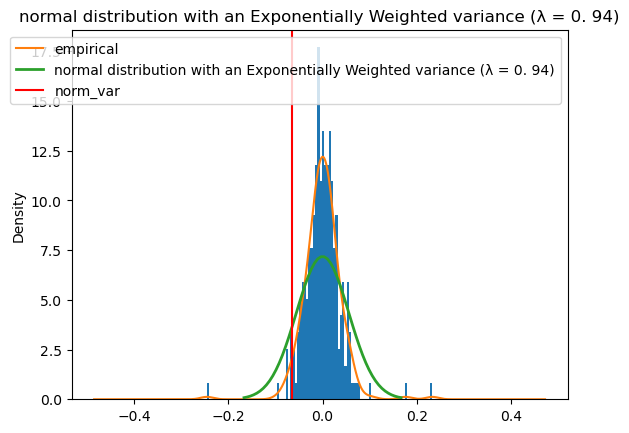

In [288]:
plt.cla()
adj_meta_mean.hist(bins=100,density=True)  
adj_meta_mean.plot(kind='kde', label = "empirical")
x = np.linspace(u - 3*sigma_ewn, u + 3*sigma_ewn) 
y = st.norm.pdf(x, loc = u, scale = sigma_ewn)
plt.plot(x, y, linewidth=2, label = "normal distribution with an Exponentially Weighted variance (λ = 0. 94)")
plt.axvline(-norm_var,color='r', label='norm_var')
plt.legend()
plt.title("normal distribution with an Exponentially Weighted variance (λ = 0. 94)")
plt.show()

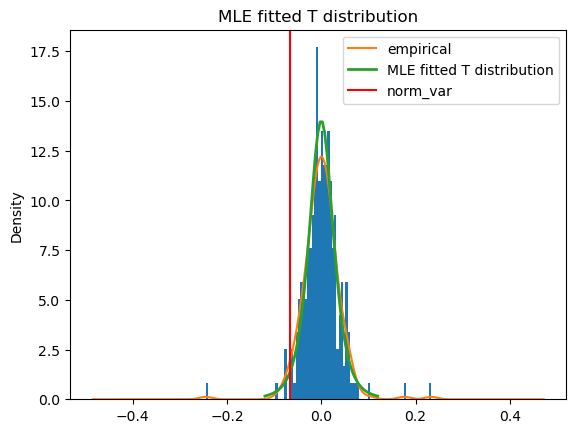

In [290]:
plt.cla()
adj_meta_mean.hist(bins=100,density=True)  
adj_meta_mean.plot(kind='kde', label = "empirical")
x = np.linspace(u - 3*sigma_n, u + 3*sigma_n) 
y = st.t.pdf(x, df = estimator[0], loc = 0, scale = estimator[1])
plt.plot(x, y, linewidth=2, label = "MLE fitted T distribution")
plt.axvline(-norm_var,color='r', label='norm_var')
plt.legend()
plt.title("MLE fitted T distribution")
plt.show()


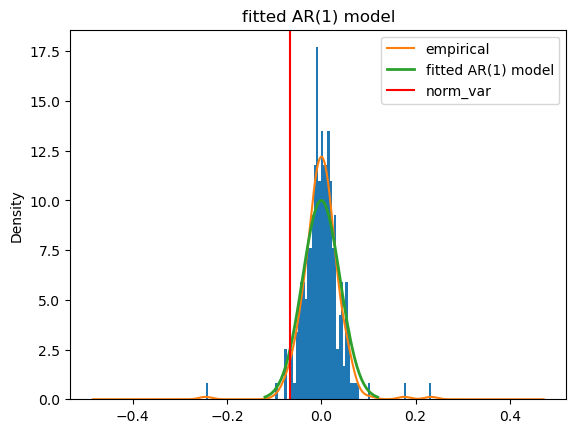

In [291]:
plt.cla()
adj_meta_mean.hist(bins=100,density=True)  
adj_meta_mean.plot(kind='kde', label = "empirical")
x = np.linspace(u - 3*sigma_ar, u + 3*sigma_ar) 
y = st.norm.pdf(x, loc = u, scale = sigma_ar)
plt.plot(x, y, linewidth=2, label = "fitted AR(1) model")
plt.axvline(-norm_var,color='r', label='norm_var')
plt.legend()
plt.title("fitted AR(1) model")
plt.show()

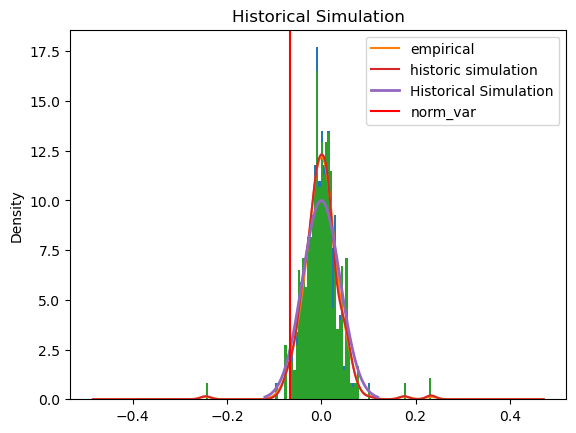

In [292]:
plt.cla()
adj_meta_mean.hist(bins=100,density=True)  
adj_meta_mean.plot(kind='kde', label = "empirical")
s_list.hist(bins=100,density=True) 
s_list.plot(kind='kde',label = "historic simulation")
plt.plot(x, y, linewidth=2, label = "Historical Simulation")
plt.axvline(-norm_var,color='r', label='norm_var')
plt.legend()
plt.title("Historical Simulation")
plt.show()

In [294]:
# Problem 3

port_A=portfolio.groupby('Portfolio').get_group("A")
port_B=portfolio.groupby('Portfolio').get_group("B")
port_C=portfolio.groupby('Portfolio').get_group("C")
port_total=portfolio.groupby('Stock')['Holding'].sum()

# return_df=return_calculate('ArithmeticReturn',Daily_Price,'Date')

def Cal_weight(lamda,n):
    w=np.zeros(n)
    total_w=0
    for i in range(n):
        tmp=(1-lamda)*pow(lamda,i-1)
        w[i]=tmp
        total_w+=tmp

    w=w/total_w
    return w
    
def Cal_cov(w,x,y):
    n=len(x)
    cov=0
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    
    for i in range(n):
        cov+=(x[i]-x_mean)*(y[i]-y_mean)*w[n-1-i]
    
    return cov


In [295]:
df1=Daily_Price.copy()
df2=df1.set_index(['Date']).stack()
df3=df2.reset_index().sort_values(by=['level_1','Date']).rename(columns={0:'price'})
df4=df3[['level_1','Date','price']].rename(columns={'level_1':'Stock'})
df5_A=pd.merge(df4,port_A,on=['Stock'],how='left')

In [296]:
def Cal_cov_matrix(lamda,df):
        
    n_assets=df.shape[1]
    n_date=df.shape[0]

    cov_mat=np.zeros((n_assets,n_assets))

    weight=Cal_weight(lamda,n_date)
    cols=df.columns

    for i in range(n_assets):
        x=cols[i]
        cov_mat[i][i]=Cal_cov(weight,df[x],df[x])
        for j in range(i+1,n_assets):
            y=cols[j]
            cov_mat[i][j]=Cal_cov(weight,df[x],df[y])
            cov_mat[j][i]=cov_mat[i][j]
    return np.array(cov_mat)

In [297]:
df5_A=df5_A.dropna()
df5_A['Total_value']=df5_A['price']*df5_A['Holding']
df5_A['Date']=pd.to_datetime(df5_A['Date'])
df5_A=df5_A.sort_values(by=['Stock','Date'])
df6_A=df5_A.groupby('Date')['Total_value'].sum()
df6_A=pd.DataFrame(df6_A).reset_index()
df6_A=df6_A.sort_values(by=['Date'])
current_date=df6_A['Date'].iloc[-1]
current_price_A=df5_A[df5_A['Date']==current_date]
current_price_A['w']=current_price_A['Total_value']/current_price_A['Total_value'].sum()
ret_A=df5_A.set_index(['Date','Stock'])['price'].unstack().pct_change().dropna()
ew_ret_A=Cal_cov_matrix(lamda=0.94,df=ret_A)
sigma_A=np.sqrt(np.matmul(np.matmul(current_price_A['w'].T,ew_ret_A),current_price_A['w']))
Delta_normal_VaR_ret_A= - norm.ppf(0.05,loc=0,scale=sigma_A)
Delta_normal_VaR_dollar_A=Delta_normal_VaR_ret_A*current_price_A['Total_value'].sum()
# his_VaR_dollar_A=-np.percentile(pd.DataFrame(df5_A.groupby('Date')['Total_value'].sum()).diff().dropna(),5)
history_list_A=pd.DataFrame(df5_A.groupby('Date')['Total_value'].sum()).diff().dropna()
simulate_list_A = history_list_A.sample(1000, replace=True)
his_VaR_dollar_A=-np.percentile(simulate_list_A,(100 * 0.05))

df5_B=pd.merge(df4,port_B,on=['Stock'],how='left')
df5_B=df5_B.dropna()
df5_B['Total_value']=df5_B['price']*df5_B['Holding']
df5_B['Date']=pd.to_datetime(df5_B['Date'])
df5_B=df5_B.sort_values(by=['Stock','Date'])
df6_B=df5_B.groupby('Date')['Total_value'].sum()
df6_B=pd.DataFrame(df6_B).reset_index()
df6_B=df6_B.sort_values(by=['Date'])
current_date=df6_B['Date'].iloc[-1]
current_price_B=df5_B[df5_B['Date']==current_date]
current_price_B['w']=current_price_B['Total_value']/current_price_B['Total_value'].sum()
ret_B=df5_B.set_index(['Date','Stock'])['price'].unstack().pct_change().dropna()
ew_ret_B=Cal_cov_matrix(lamda=0.94,df=ret_B)
sigma_B=np.sqrt(np.matmul(np.matmul(current_price_B['w'].T,ew_ret_B),current_price_B['w']))
Delta_normal_VaR_ret_B= - norm.ppf(0.05,loc=0,scale=sigma_B)
Delta_normal_VaR_dollar_B=Delta_normal_VaR_ret_B*current_price_B['Total_value'].sum()
# his_VaR_dollar_B=-np.percentile(pd.DataFrame(df5_B.groupby('Date')['Total_value'].sum()).diff().dropna(),5)
history_list_B=pd.DataFrame(df5_B.groupby('Date')['Total_value'].sum()).diff().dropna()
simulate_list_B = history_list_B.sample(1000, replace=True)
his_VaR_dollar_B=-np.percentile(simulate_list_B,(100 * 0.05))

df5_C=pd.merge(df4,port_C,on=['Stock'],how='left')
df5_C=df5_C.dropna()
df5_C['Total_value']=df5_C['price']*df5_C['Holding']
df5_C['Date']=pd.to_datetime(df5_C['Date'])
df5_C=df5_C.sort_values(by=['Stock','Date'])
df6_C=df5_C.groupby('Date')['Total_value'].sum()
df6_C=pd.DataFrame(df6_C).reset_index()
df6_C=df6_C.sort_values(by=['Date'])
current_date=df6_C['Date'].iloc[-1]
current_price_C=df5_C[df5_C['Date']==current_date]
current_price_C['w']=current_price_C['Total_value']/current_price_C['Total_value'].sum()
ret_C=df5_C.set_index(['Date','Stock'])['price'].unstack().pct_change().dropna()
ew_ret_C=Cal_cov_matrix(lamda=0.94,df=ret_C)
sigma_C=np.sqrt(np.matmul(np.matmul(current_price_C['w'].T,ew_ret_C),current_price_C['w']))
Delta_normal_VaR_ret_C= - norm.ppf(0.05,loc=0,scale=sigma_C)
Delta_normal_VaR_dollar_C=Delta_normal_VaR_ret_C*current_price_C['Total_value'].sum()
history_list_C=pd.DataFrame(df5_C.groupby('Date')['Total_value'].sum()).diff().dropna()
simulate_list_C = history_list_C.sample(1000, replace=True)
his_VaR_dollar_C=-np.percentile(simulate_list_C,(100 * 0.05))

df5_t=pd.merge(df4,portfolio,on=['Stock'],how='left')
df5_t=df5_t.dropna()
df5_t['Total_value']=df5_t['price']*df5_t['Holding']
df5_t['Date']=pd.to_datetime(df5_t['Date'])
df5_t=df5_t.sort_values(by=['Stock','Date'])
df6_t=df5_t.groupby('Date')['Total_value'].sum()
df6_t=pd.DataFrame(df6_t).reset_index()
df6_t=df6_t.sort_values(by=['Date'])
current_date=df6_t['Date'].iloc[-1]
current_price_t=df5_t[df5_t['Date']==current_date]
current_price_t['w']=current_price_t['Total_value']/current_price_t['Total_value'].sum()
ret_t=df5_t.set_index(['Date','Stock'])['price'].unstack().pct_change().dropna()
ew_ret_t=Cal_cov_matrix(lamda=0.94,df=ret_t)
sigma_t=np.sqrt(np.matmul(np.matmul(current_price_t['w'].T,ew_ret_t),current_price_t['w']))
Delta_normal_VaR_ret_t= - norm.ppf(0.05,loc=0,scale=sigma_t)
Delta_normal_VaR_dollar_t=Delta_normal_VaR_ret_t*current_price_t['Total_value'].sum()
# his_VaR_dollar_t=-np.percentile(pd.DataFrame(df5_t.groupby('Date')['Total_value'].sum()).diff().dropna(),5)
history_list_t=pd.DataFrame(df5_t.groupby('Date')['Total_value'].sum()).diff().dropna()
simulate_list_t = history_list_t.sample(1000, replace=True)
his_VaR_dollar_t=-np.percentile(simulate_list_t,(100 * 0.05))



C:\Users\98317\AppData\Local\Temp\ipykernel_11316\2868707351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_price_A['w']=current_price_A['Total_value']/current_price_A['Total_value'].sum()
C:\Users\98317\AppData\Local\Temp\ipykernel_11316\2868707351.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_price_B['w']=current_price_B['Total_value']/current_price_B['Total_value'].sum()
C:\Users\98317\AppData\Local\Temp\ipykernel_11316\2868707351.py:52: SettingWithCopyWarning: 
A value is tr

In [299]:
print('When alpha = 0.05:')
print('* Delta Normal VaRs:')
print("       portfolio A:(VaRret): "+ str(Delta_normal_VaR_ret_A))
print("       portfolio B:(VaRret): "+ str(Delta_normal_VaR_ret_B))
print("       portfolio C:(VaRret): "+ str(Delta_normal_VaR_ret_C))
print("       portfolio Total:(VaRret): "+ str(Delta_normal_VaR_ret_t))
print("       portfolio A:(VaR$): "+ str(Delta_normal_VaR_dollar_A))
print("       portfolio B:(VaR$): "+ str(Delta_normal_VaR_dollar_B))
print("       portfolio C:(VaR$): "+ str(Delta_normal_VaR_dollar_C))
print("       portfolio Total:(VaR$): "+ str(Delta_normal_VaR_dollar_t))
print('* Historical VaRs:')
print("       portfolio A:(VaR$): "+ str(his_VaR_dollar_A))
print("       portfolio B:(VaR$): "+ str(his_VaR_dollar_B))
print("       portfolio C:(VaR$): "+ str(his_VaR_dollar_C))
print("       portfolio Total:(VaR$): "+ str(his_VaR_dollar_t))

When alpha = 0.05:
* Delta Normal VaRs:
       portfolio A:(VaRret): 0.01890382331530241
       portfolio B:(VaRret): 0.015267725564605946
       portfolio C:(VaRret): 0.014022179383209496
       portfolio Total:(VaRret): 0.015707326971388668
       portfolio A:(VaR$): 5670.202920147335
       portfolio B:(VaR$): 4494.59841077826
       portfolio C:(VaR$): 3786.589010809051
       portfolio Total:(VaR$): 13577.075418977081
* Historical VaRs:
       portfolio A:(VaR$): 8304.068056280026
       portfolio B:(VaR$): 6201.592045270023
       portfolio C:(VaR$): 5281.497635230015
       portfolio Total:(VaR$): 18652.46984949999
